# K-Means Clustering
## CS/DSA 5970

In [259]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import pickle as pkl
import random

##################
# Default parameters
FIGURESIZE=(10,6)
FONTSIZE=24

plt.rcParams['figure.figsize'] = FIGURESIZE
plt.rcParams['font.size'] = FONTSIZE

plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18

In [260]:
def scatter_plot(ins, pred=None, centers=None):
    fig, ax = plt.subplots(figsize=FIGURESIZE)
    
    if pred is None:
        # Class labels not given: just plot the points in green
        ax.plot(ins[:,0], ins[:,1], 'g.')
    else:
        # Class labels given: assign colors according to this label
        ax.scatter(ins[:,0], ins[:,1], c=pred, 
                   s=3, cmap=plt.cm.rainbow)
    
    
    if centers is not None:
        # Cluster centers have also been given: plot these, too
        mn = np.min(pred)
        mx = np.max(pred)
        ax.scatter(centers[:,0], centers[:,1], c=np.arange(mn,mx+1), 
                   marker='D',
                   s=100,
                   cmap=plt.cm.rainbow)

## Load data

In [261]:
fname = '../ml_practices/imports/datasets/misc/classification_data.pkl'
fp = open(fname, 'rb')
ins = pkl.load(fp)
#outs = pkl.load(fp)  # Don't need the outs
fp.close()

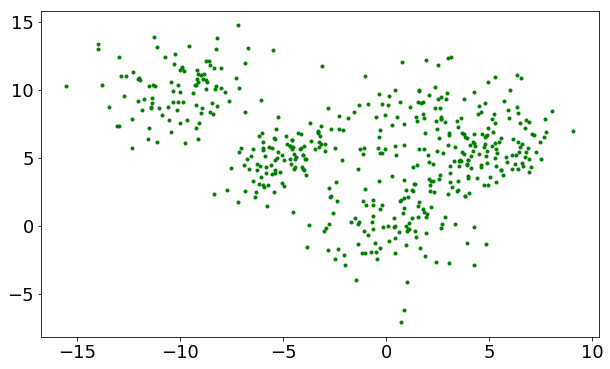

In [262]:
scatter_plot(ins)

## K-Means Model

In [237]:
model = KMeans(n_clusters = 10, init='random', 
              n_init=10, n_jobs=-1)
model.fit(ins)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=-1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [238]:
pred = model.predict(ins)
model.cluster_centers_

array([[ -1.87781106,   0.30660419],
       [-11.41621683,   9.01432908],
       [  1.88131357,   8.94872911],
       [  1.26435038,  -1.09259058],
       [ -8.69436376,  11.05827545],
       [ -2.14620613,   6.70855669],
       [  2.0176692 ,   3.25251449],
       [  6.23510662,   8.25013492],
       [ -5.47311493,   4.66492106],
       [  5.03830254,   5.2029382 ]])

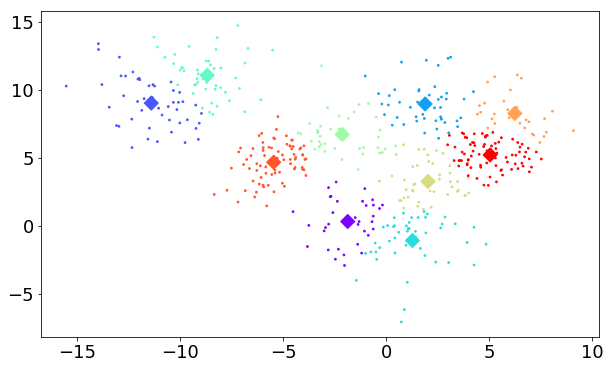

In [239]:
scatter_plot(ins, pred, model.cluster_centers_)

## Arrow Data Set


In [263]:
t = np.arange(-1, 1, .001)
x1 = [0.02*random.uniform(-1,1) if (v < .5 and v > -.5) 
      else 2*(1+v)*random.uniform(-1,1) if v <= -.5 
      else 2*(-.5+v)*random.uniform(-1,1) for v in t]
x0 = t
x2 = np.cos(t*5+1.5)

x0 = np.array([x0])
x1 = np.array([x1])
x2 = np.array([x2])
x = np.concatenate([x0, x1], axis=0).T

In [256]:
model2 = KMeans(n_clusters = 10, init='random', 
              n_init=1, n_jobs=-1)
model2.fit(x)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
    n_clusters=10, n_init=1, n_jobs=-1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [257]:
pred2 = model2.predict(x)
model2.cluster_centers_

array([[ 3.32500000e-01,  3.82980044e-04],
       [-6.04911111e-01, -6.54297204e-01],
       [-7.23052632e-01, -2.47568381e-01],
       [ 8.60318584e-01,  4.94355386e-01],
       [-6.34304348e-01,  4.83676570e-01],
       [-6.50000000e-03, -4.95291636e-04],
       [ 6.64906015e-01,  1.53345824e-02],
       [-8.69280952e-01,  3.92589609e-02],
       [-3.51180758e-01,  1.66061804e-03],
       [ 8.34741667e-01, -3.87581798e-01]])

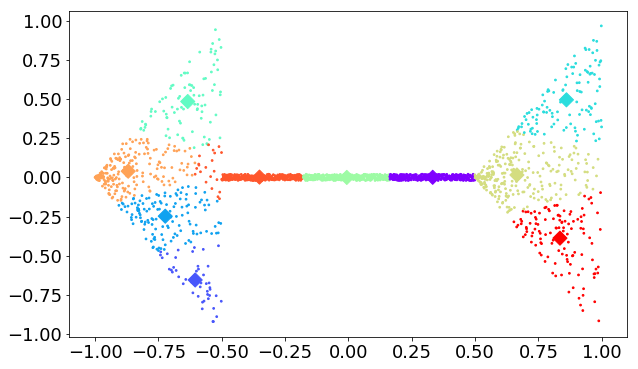

In [258]:
scatter_plot(x, pred2, model2.cluster_centers_)

## Gaussian Mixture Models

In [288]:
model3 = GaussianMixture(n_components=10, n_init=1)
model3.fit(ins)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=10, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [289]:
model3.means_

array([[ -4.12929585,   6.01576002],
       [  4.67165765,   7.40053873],
       [-10.14963007,   8.52591826],
       [ -1.33506187,   0.01327895],
       [ -9.89493157,  11.07196978],
       [ -5.51489167,   4.36302414],
       [  1.1351285 ,   8.33229595],
       [  2.9432792 ,   4.02358414],
       [  1.35723011,   0.28185286],
       [  5.76892381,   5.24421078]])

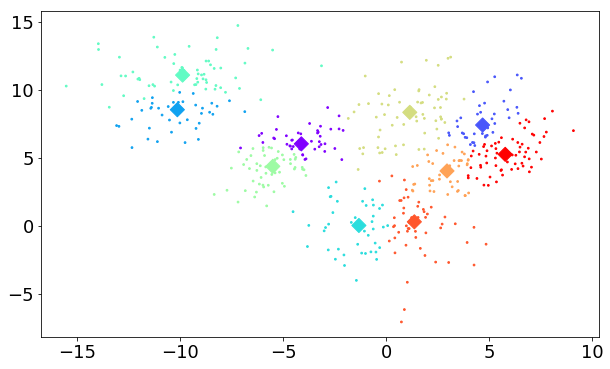

In [290]:
pred3 = model3.predict(ins)
scatter_plot(ins, pred3, model3.means_)

## Arrow Data Set

In [299]:
model4 = GaussianMixture(n_components=7, n_init=1)
model4.fit(x)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=7, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

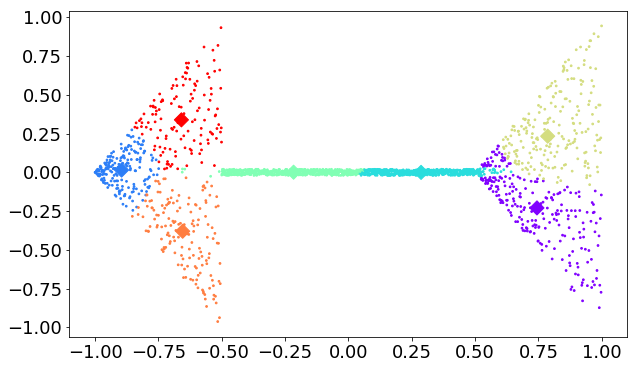

In [300]:
pred4 = model4.predict(x)
scatter_plot(x, pred4, model4.means_)